In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib import cm
import ImageManipulation as IM
import os
from scipy.optimize import curve_fit
from PIL import Image
from importlib import reload
import gc

In [2]:
def fitNrois(image, ROIfile, model, roiSize, outdir, showfig, savefig):
    #load ROI file
    ROIs = np.genfromtxt(ROIfile)
    
    #initialize arrays
    NROIs = ROIs.shape[0] - 1 #last entry contains zeros
    outROI = np.zeros([NROIs*3, 6])
    paramlst = []
    
    j = 0
    #loop over all ROIs
    for i in range(NROIs): 
        #get ROI from image
        identifier = os.path.split(ROIfile)[-1][:-4] + ' ROI %i' %i
        cornery, cornerx = ROIs[i, [0, 2]].astype(np.int)
        xshape, yshape = image.shape[:2]
        if cornerx < 0 or cornery < 0 or cornerx + roiSize >= xshape or cornery + roiSize >= yshape:
            print ('ROI %i touches image border, skipping \n' % i)
            continue
        else:
            ROIsnip = image[cornerx: cornerx + roiSize, cornery: cornery + roiSize]
        
        #execute fit for ROI  
        params = IM.fitImage.fitNGauss(ROIsnip, model, identifier, savefig, showfig, outdir)
        print('info message from bfgs algorithm is %i \n' % int(params[12]))
        outROI[j] = [cornery + int(params[0] + 0.5) - 3,
                    7,
                    cornerx + int(params[1] + 0.5) - 3,
                    7,
                    cornery + int(params[0] + 0.5),
                    cornerx + int(params[1] + 0.5)] 
                    #xcorner, xrange, ycorner, yrange, xcenter, ycenter
        j += 1
        if model == 'two2DGaussian_py' or model == 'two2DGaussian_c':
            outROI[j] = [cornery + int(params[6] + 0.5) - 3,
                            7, 
                            cornerx + int(params[7] + 0.5) - 3,
                            7,
                            cornery + int(params[6] + 0.5),
                            cornerx + int(params[7] + 0.5)] 
            j+= 1
        if model == 'three2DGaussian_py' or model == 'three2DGaussian_c':
            outROI[j] = [cornery + int(params[9] + 0.5) - 3,
                            7, 
                            cornerx + int(params[10] + 0.5) - 3,
                            7,
                            cornery + int(params[9] + 0.5),
                            cornerx + int(params[10] + 0.5)] 
            j+= 1
        paramlst.append(params)
    #save output
    np.savetxt(os.path.join(outdir, outname), outROI, fmt = '%d', delimiter = '\t')
        
    return paramlst

In [3]:
files = ['TLMR_1.ptu',
        'TLMR_2.ptu',
        'TLMR_3.ptu',
        'TLMR_4.ptu',
        'TLMR_5.ptu',
        'TLMR_6.ptu',
        'TLMR_7.ptu',
        'TLMR_8.ptu',
        'TLMR_9.ptu',
        'TLMR_10.ptu',
        'TLMR_11.ptu',
        'TLMR_12.ptu',
        'TLMR_13.ptu',
        'TLMR_14.ptu',
        'TLMR_15.ptu',
        'TLMR_16.ptu',
        'TLMR_17.ptu',
        'TLMR_18.ptu',
        'TLMR_19.ptu',
        'TLMR_20.ptu']
roifiles = ['TLMR_1_Yellow Photons.roi',
           'TLMR_2_Yellow Photons.roi',
           'TLMR_3_Yellow Photons.roi',
           'TLMR_4_Yellow Photons.roi',
           'TLMR_5_Yellow Photons.roi',
           'TLMR_6_Yellow Photons.roi',
           'TLMR_7_Yellow Photons.roi',
           'TLMR_8_Yellow Photons.roi',
           'TLMR_9_Yellow Photons.roi',
           'TLMR_10_Yellow Photons.roi',
           'TLMR_11_Yellow Photons.roi',
           'TLMR_12_Yellow Photons.roi',
           'TLMR_13_Yellow Photons.roi',
           'TLMR_14_Yellow Photons.roi',
           'TLMR_15_Yellow Photons.roi',
           'TLMR_16_Yellow Photons.roi',
           'TLMR_17_Yellow Photons.roi',
           'TLMR_18_Yellow Photons.roi',
           'TLMR_19_Yellow Photons.roi',
           'TLMR_20_Yellow Photons.roi']

In [6]:
roifiles = ['TLMR_1_Yellow Photons.roi']
files = ['TLMR_1.ptu']

header dir already exists
b'N:\\Singlem\\singlem19-4\\October\\15_origamisT-LMR_NV\\TLMR_ensemble\\header\\TLMR_1.txt'
number of records is 6265851
TLMR_1_Yellow Photons ROI 0:value of Istar is -0.51 and Istarthreshold is -0.28, success!


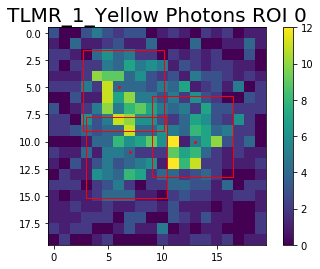

info message from bfgs algorithm is 4 

TLMR_1_Yellow Photons ROI 1 attempt 0: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 1 attempt 1: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 1 attempt 2: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 1 attempt 3: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 1 attempt 4: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 1 attempt 5: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 1 attempt 6: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 1 attempt 7: value of Istar is -0.60 and Istarthreshold is -0.82, trying again
TLMR_1_Yellow Photons ROI 1 attempt 8: c routine returned info -1, trying again
TLMR_1_Yellow Photons ROI 1:value of Istar is -1.01 and Istarthreshold is -0.82, success!


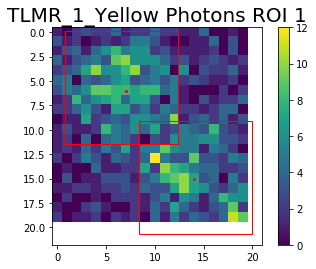

info message from bfgs algorithm is 4 

TLMR_1_Yellow Photons ROI 2 attempt 0: c routine returned info -1, trying again
TLMR_1_Yellow Photons ROI 2 attempt 1: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 2 attempt 2: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 2 attempt 3: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 2 attempt 4: c routine returned info -1, trying again
TLMR_1_Yellow Photons ROI 2 attempt 5: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 2 attempt 6: c routine returned info -1, trying again
TLMR_1_Yellow Photons ROI 2 attempt 7: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 2 attempt 8: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 2 attempt 9: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 2 attempt 10: c routine returned info -1, trying again
TLMR_1_Yellow Photons ROI 2 attempt 11: c routine returned info 2, trying again
TLMR_1

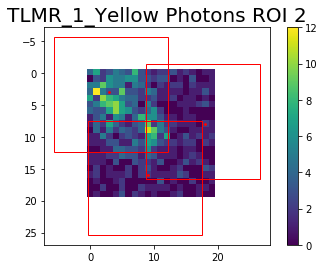

info message from bfgs algorithm is -1 

TLMR_1_Yellow Photons ROI 3 attempt 0: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 3 attempt 1: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 3 attempt 2: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 3 attempt 3: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 3 attempt 4: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 3 attempt 5: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 3 attempt 6: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 3 attempt 7: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 3 attempt 8: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 3:value of Istar is -1.25 and Istarthreshold is -1.02, success!


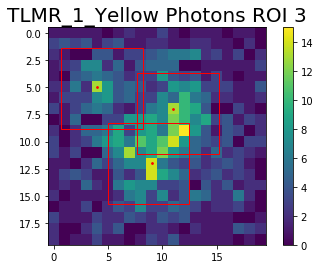

info message from bfgs algorithm is 4 

TLMR_1_Yellow Photons ROI 4 attempt 0: value of Istar is -0.10 and Istarthreshold is -0.89, trying again
TLMR_1_Yellow Photons ROI 4 attempt 1: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 4 attempt 2: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 4:value of Istar is -1.09 and Istarthreshold is -0.89, success!


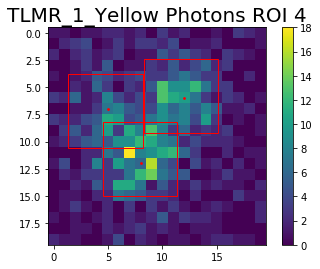

info message from bfgs algorithm is 4 

TLMR_1_Yellow Photons ROI 5 attempt 0: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 5 attempt 1: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 5 attempt 2: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 5 attempt 3: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 5:value of Istar is -1.09 and Istarthreshold is -0.87, success!


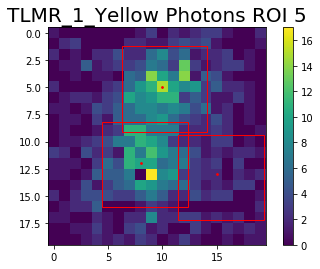

info message from bfgs algorithm is 4 

TLMR_1_Yellow Photons ROI 6:value of Istar is -2.86 and Istarthreshold is -2.59, success!


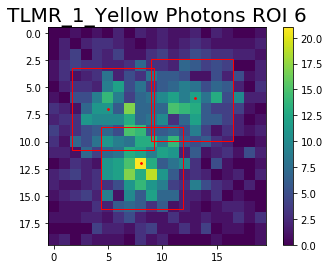

info message from bfgs algorithm is 4 

TLMR_1_Yellow Photons ROI 7 attempt 0: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 7 attempt 1: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 7 attempt 2: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 7 attempt 3: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 7 attempt 4: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 7 attempt 5: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 7 attempt 6: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 7 attempt 7: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 7 attempt 8: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 7 attempt 9: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 7 attempt 10: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 7 attempt 11: c routine returned info -1, trying again
TLMR_1_Ye

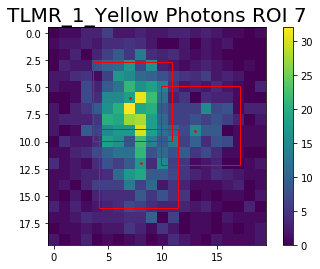

info message from bfgs algorithm is 4 

TLMR_1_Yellow Photons ROI 8 attempt 0: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 8 attempt 1: c routine returned info -1, trying again
TLMR_1_Yellow Photons ROI 8 attempt 2: value of Istar is 0.24 and Istarthreshold is -0.32, trying again
TLMR_1_Yellow Photons ROI 8 attempt 3: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 8 attempt 4: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 8 attempt 5: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 8 attempt 6: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 8 attempt 7: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 8 attempt 8: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 8 attempt 9: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 8:value of Istar is -0.57 and Istarthreshold is -0.32, success!


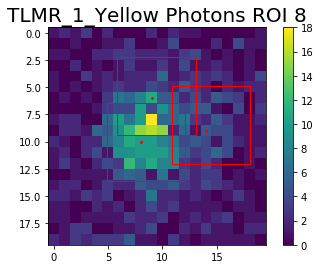

info message from bfgs algorithm is 4 

TLMR_1_Yellow Photons ROI 9 attempt 0: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 9 attempt 1: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 9 attempt 2: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 9 attempt 3: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 9 attempt 4: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 9 attempt 5: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 9 attempt 6: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 9 attempt 7: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 9 attempt 8: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 9 attempt 9: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 9 attempt 10: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 9 attempt 11: c routine returned info 1, trying again
TLMR_1_Yel

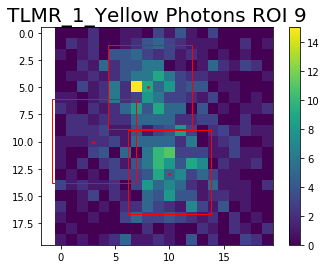

info message from bfgs algorithm is 4 

TLMR_1_Yellow Photons ROI 10 attempt 0: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 10 attempt 1: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 10 attempt 2: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 10 attempt 3: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 10 attempt 4: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 10 attempt 5: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 10 attempt 6: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 10 attempt 7: c routine returned info -1, trying again
TLMR_1_Yellow Photons ROI 10 attempt 8: value of Istar is -3.58 and Istarthreshold is -4.82, trying again
TLMR_1_Yellow Photons ROI 10 attempt 9: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 10 attempt 10: c routine returned info -1, trying again
TLMR_1_Yellow Photons ROI 10 attempt 11: c routine 

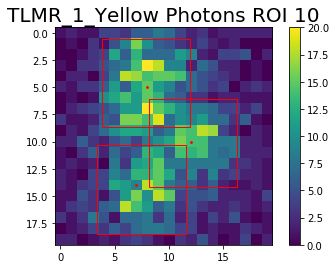

info message from bfgs algorithm is 4 

TLMR_1_Yellow Photons ROI 11 attempt 0: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 11 attempt 1: value of Istar is -0.36 and Istarthreshold is -1.26, trying again
TLMR_1_Yellow Photons ROI 11 attempt 2: c routine returned info -1, trying again
TLMR_1_Yellow Photons ROI 11 attempt 3: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 11 attempt 4: c routine returned info -1, trying again
TLMR_1_Yellow Photons ROI 11 attempt 5: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 11 attempt 6: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 11 attempt 7: c routine returned info -1, trying again
TLMR_1_Yellow Photons ROI 11 attempt 8: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 11 attempt 9: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 11 attempt 10: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 11 attempt 11: c routine

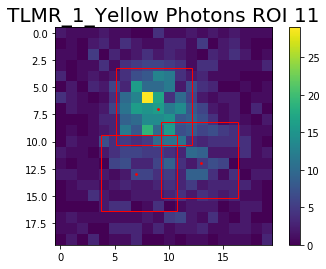

info message from bfgs algorithm is 4 

TLMR_1_Yellow Photons ROI 12 attempt 0: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 12 attempt 1: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 12 attempt 2: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 12 attempt 3: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 12 attempt 4: value of Istar is -0.93 and Istarthreshold is -2.02, trying again
TLMR_1_Yellow Photons ROI 12 attempt 5: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 12 attempt 6: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 12 attempt 7: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 12 attempt 8: c routine returned info -1, trying again
TLMR_1_Yellow Photons ROI 12 attempt 9: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 12 attempt 10: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 12:value of Istar is -2.23

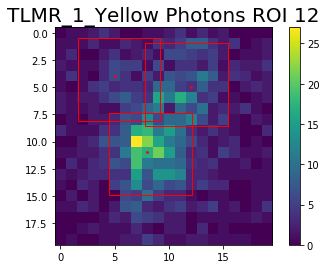

info message from bfgs algorithm is 4 

TLMR_1_Yellow Photons ROI 13 attempt 0: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 13:value of Istar is -1.08 and Istarthreshold is -0.86, success!


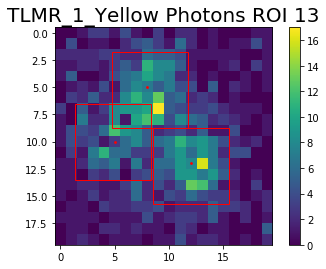

info message from bfgs algorithm is 4 

TLMR_1_Yellow Photons ROI 14 attempt 0: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 14:value of Istar is -0.72 and Istarthreshold is -0.48, success!


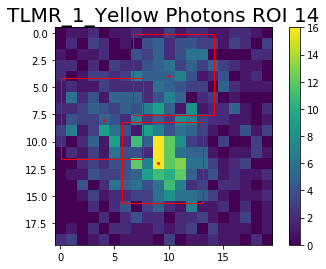

info message from bfgs algorithm is 4 

TLMR_1_Yellow Photons ROI 15 attempt 0: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 15 attempt 1: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 15 attempt 2: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 15 attempt 3: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 15 attempt 4: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 15 attempt 5: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 15 attempt 6: c routine returned info -1, trying again
TLMR_1_Yellow Photons ROI 15 attempt 7: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 15 attempt 8: c routine returned info -1, trying again
TLMR_1_Yellow Photons ROI 15 attempt 9: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 15 attempt 10: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 15 attempt 11: c routine returned info 1, trying ag

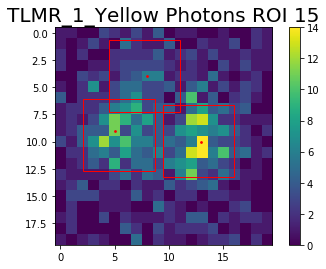

info message from bfgs algorithm is 4 

TLMR_1_Yellow Photons ROI 16 attempt 0: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 16 attempt 1: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 16 attempt 2: c routine returned info -1, trying again
TLMR_1_Yellow Photons ROI 16 attempt 3: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 16 attempt 4: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 16 attempt 5: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 16 attempt 6: c routine returned info -1, trying again
TLMR_1_Yellow Photons ROI 16 attempt 7: c routine returned info -1, trying again
TLMR_1_Yellow Photons ROI 16 attempt 8: c routine returned info 2, trying again
TLMR_1_Yellow Photons ROI 16 attempt 9: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 16 attempt 10: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 16 attempt 11: c routine returned info 1, trying a

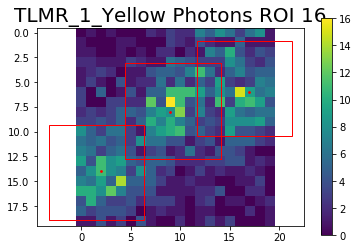

info message from bfgs algorithm is 4 

ROI 17 touches image border, skipping 

TLMR_1_Yellow Photons ROI 18 attempt 0: c routine returned info 1, trying again
TLMR_1_Yellow Photons ROI 18:value of Istar is 0.31 and Istarthreshold is 0.50, success!


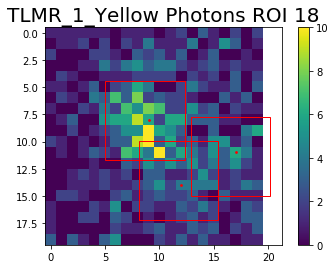

info message from bfgs algorithm is 4 

ROI 19 touches image border, skipping 

header dir already exists
b'N:\\Singlem\\singlem19-4\\October\\15_origamisT-LMR_NV\\TLMR_ensemble\\header\\TLMR_2.txt'
number of records is 6577820
ROI 0 touches image border, skipping 

ROI 1 touches image border, skipping 

TLMR_2_Yellow Photons ROI 2 attempt 0: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 2 attempt 1: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 2 attempt 2: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 2 attempt 3: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 2 attempt 4: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 2 attempt 5: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 2:value of Istar is -3.58 and Istarthreshold is -3.32, success!


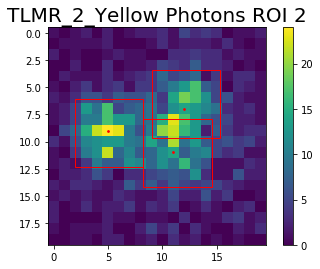

info message from bfgs algorithm is 4 

TLMR_2_Yellow Photons ROI 3 attempt 0: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 3 attempt 1: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 3:value of Istar is -2.56 and Istarthreshold is -2.30, success!


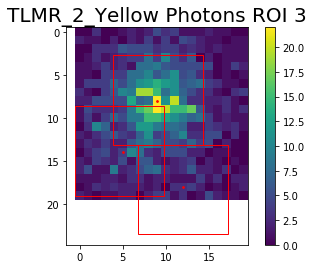

info message from bfgs algorithm is 4 

TLMR_2_Yellow Photons ROI 4 attempt 0: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 4 attempt 1: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 4 attempt 2: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 4 attempt 3: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 4 attempt 4: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 4:value of Istar is -1.30 and Istarthreshold is -1.09, success!


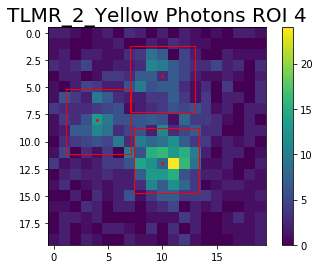

info message from bfgs algorithm is 4 

TLMR_2_Yellow Photons ROI 5 attempt 0: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 5 attempt 1: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 5 attempt 2: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 5 attempt 3: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 5 attempt 4: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 5 attempt 5: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 5 attempt 6: value of Istar is 0.64 and Istarthreshold is 0.05, trying again
TLMR_2_Yellow Photons ROI 5 attempt 7: value of Istar is 0.64 and Istarthreshold is 0.05, trying again
TLMR_2_Yellow Photons ROI 5 attempt 8: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 5:value of Istar is -0.26 and Istarthreshold is 0.05, success!


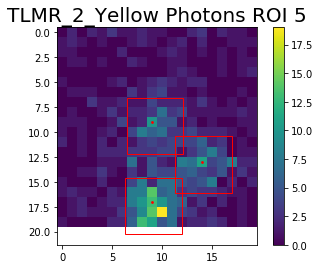

info message from bfgs algorithm is 4 

TLMR_2_Yellow Photons ROI 6 attempt 0: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 6:value of Istar is -0.70 and Istarthreshold is -0.42, success!


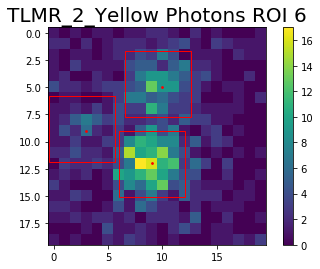

info message from bfgs algorithm is 4 

TLMR_2_Yellow Photons ROI 7 attempt 0: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 7 attempt 1: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 7 attempt 2: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 7 attempt 3: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 7 attempt 4: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 7 attempt 5: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 7 attempt 6: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 7 attempt 7: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 7 attempt 8: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 7 attempt 9: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 7:value of Istar is -0.20 and Istarthreshold is -0.04, success!


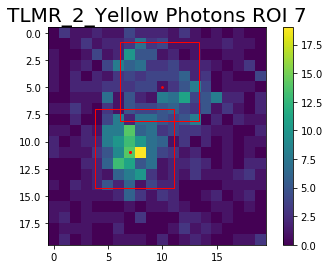

info message from bfgs algorithm is 4 

TLMR_2_Yellow Photons ROI 8 attempt 0: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 8 attempt 1: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 8 attempt 2: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 8 attempt 3: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 8 attempt 4: value of Istar is 0.38 and Istarthreshold is -0.36, trying again
TLMR_2_Yellow Photons ROI 8 attempt 5: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 8 attempt 6: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 8 attempt 7: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 8 attempt 8: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 8 attempt 9: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 8:value of Istar is -0.62 and Istarthreshold is -0.36, success!


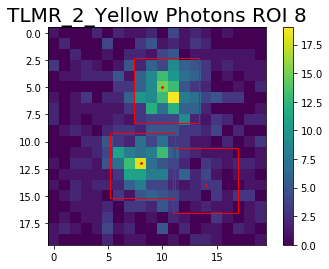

info message from bfgs algorithm is 4 

ROI 9 touches image border, skipping 

TLMR_2_Yellow Photons ROI 10 attempt 0: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 10:value of Istar is -4.33 and Istarthreshold is -4.10, success!


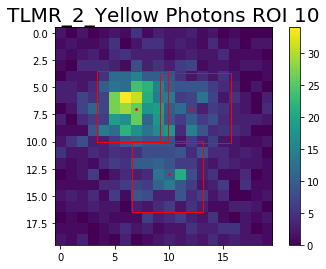

info message from bfgs algorithm is 4 

TLMR_2_Yellow Photons ROI 11 attempt 0: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 11:value of Istar is -1.84 and Istarthreshold is -1.57, success!


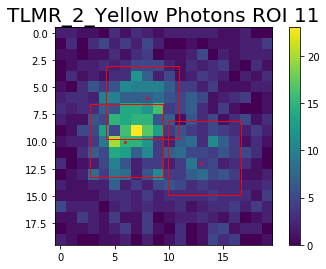

info message from bfgs algorithm is 4 

TLMR_2_Yellow Photons ROI 12 attempt 0: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 12 attempt 1: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 12 attempt 2: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 12 attempt 3: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 12 attempt 4: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 12 attempt 5: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 12 attempt 6: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 12 attempt 7: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 12 attempt 8: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 12 attempt 9: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 12 attempt 10: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 12 attempt 11: c routine returned info 1, trying ag

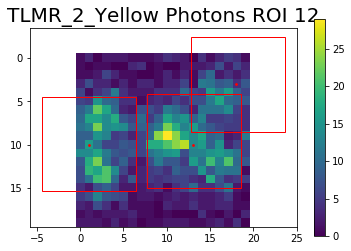

info message from bfgs algorithm is -1 

TLMR_2_Yellow Photons ROI 13 attempt 0: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 13 attempt 1: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 13 attempt 2: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 13 attempt 3: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 13 attempt 4: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 13 attempt 5: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 13 attempt 6: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 13 attempt 7: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 13 attempt 8: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 13 attempt 9: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 13 attempt 10: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 13 attempt 11: c routine returned info 2, trying a

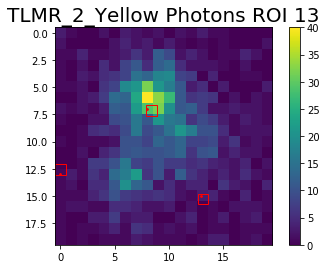

info message from bfgs algorithm is -1 

TLMR_2_Yellow Photons ROI 14 attempt 0: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 14 attempt 1: value of Istar is 0.11 and Istarthreshold is -0.38, trying again
TLMR_2_Yellow Photons ROI 14 attempt 2: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 14 attempt 3: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 14:value of Istar is -0.63 and Istarthreshold is -0.38, success!


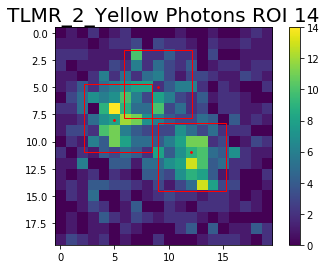

info message from bfgs algorithm is 4 

TLMR_2_Yellow Photons ROI 15 attempt 0: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 15 attempt 1: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 15 attempt 2: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 15 attempt 3: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 15 attempt 4: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 15 attempt 5: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 15 attempt 6: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 15 attempt 7: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 15 attempt 8: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 15 attempt 9: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 15 attempt 10: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 15 attempt 11: c routine returned info -1, trying ag

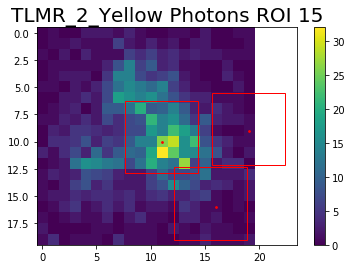

info message from bfgs algorithm is -1 

TLMR_2_Yellow Photons ROI 16:value of Istar is -3.98 and Istarthreshold is -3.72, success!


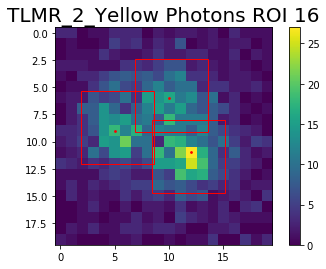

info message from bfgs algorithm is 4 

TLMR_2_Yellow Photons ROI 17 attempt 0: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 17 attempt 1: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 17 attempt 2: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 17 attempt 3: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 17 attempt 4: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 17 attempt 5: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 17 attempt 6: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 17 attempt 7: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 17 attempt 8: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 17 attempt 9: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 17 attempt 10: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 17 attempt 11: c routine returned info 2, trying aga

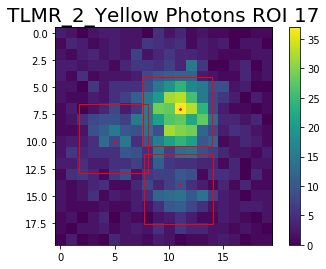

info message from bfgs algorithm is -1 

TLMR_2_Yellow Photons ROI 18 attempt 0: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 18 attempt 1: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 18 attempt 2: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 18 attempt 3: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 18:value of Istar is -1.76 and Istarthreshold is -1.49, success!


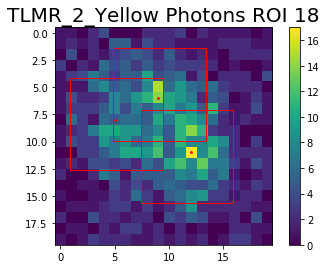

info message from bfgs algorithm is 4 

TLMR_2_Yellow Photons ROI 19:value of Istar is -1.72 and Istarthreshold is -1.51, success!


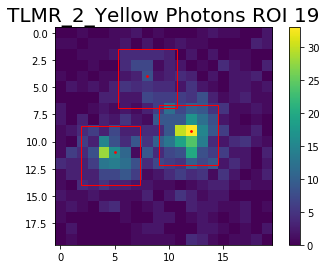

info message from bfgs algorithm is 4 

TLMR_2_Yellow Photons ROI 20 attempt 0: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 20 attempt 1: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 20 attempt 2: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 20 attempt 3: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 20 attempt 4: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 20 attempt 5: value of Istar is -0.30 and Istarthreshold is -0.97, trying again
TLMR_2_Yellow Photons ROI 20 attempt 6: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 20 attempt 7: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 20 attempt 8: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 20 attempt 9: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 20 attempt 10: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 20:value of Istar is -1.2

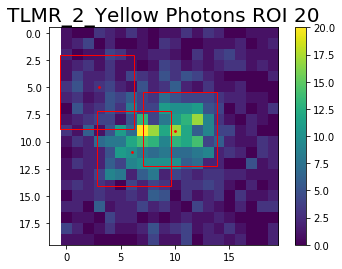

info message from bfgs algorithm is 4 

TLMR_2_Yellow Photons ROI 21 attempt 0: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 21 attempt 1: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 21 attempt 2: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 21 attempt 3: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 21 attempt 4: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 21 attempt 5: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 21 attempt 6: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 21:value of Istar is -1.40 and Istarthreshold is -1.12, success!


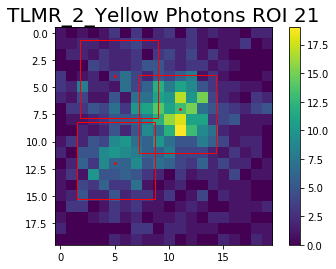

info message from bfgs algorithm is 4 

ROI 22 touches image border, skipping 

TLMR_2_Yellow Photons ROI 23 attempt 0: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 23 attempt 1: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 23 attempt 2: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 23 attempt 3: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 23 attempt 4: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 23 attempt 5: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 23 attempt 6: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 23:value of Istar is -1.32 and Istarthreshold is -1.08, success!


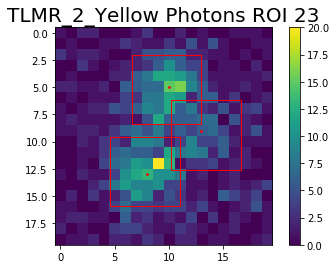

info message from bfgs algorithm is 4 

TLMR_2_Yellow Photons ROI 24 attempt 0: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 24 attempt 1: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 24 attempt 2: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 24 attempt 3: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 24 attempt 4: value of Istar is 0.45 and Istarthreshold is 0.10, trying again
TLMR_2_Yellow Photons ROI 24 attempt 5: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 24 attempt 6: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 24:value of Istar is -0.18 and Istarthreshold is 0.10, success!


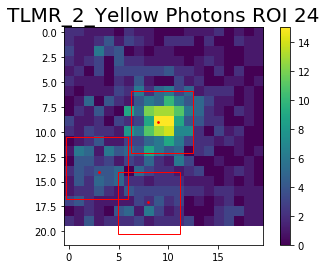

info message from bfgs algorithm is 4 

TLMR_2_Yellow Photons ROI 25:value of Istar is -0.56 and Istarthreshold is -0.32, success!


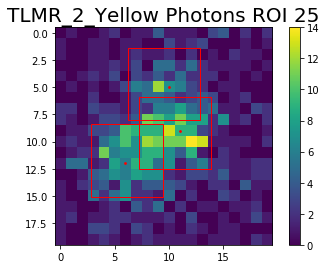

info message from bfgs algorithm is 4 

TLMR_2_Yellow Photons ROI 26 attempt 0: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 26 attempt 1: value of Istar is -0.66 and Istarthreshold is -1.29, trying again
TLMR_2_Yellow Photons ROI 26 attempt 2: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 26 attempt 3: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 26 attempt 4: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 26 attempt 5: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 26:value of Istar is -1.52 and Istarthreshold is -1.29, success!


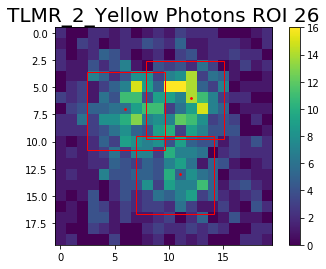

info message from bfgs algorithm is 4 

TLMR_2_Yellow Photons ROI 27:value of Istar is -1.99 and Istarthreshold is -1.95, success!


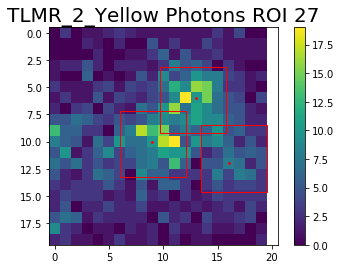

info message from bfgs algorithm is 4 

TLMR_2_Yellow Photons ROI 28 attempt 0: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 28 attempt 1: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 28 attempt 2: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 28:value of Istar is -0.54 and Istarthreshold is -0.30, success!


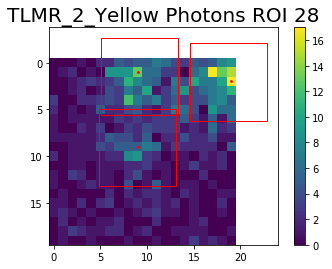

info message from bfgs algorithm is 4 

TLMR_2_Yellow Photons ROI 29 attempt 0: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 29 attempt 1: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 29 attempt 2: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 29 attempt 3: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 29 attempt 4: c routine returned info 2, trying again
TLMR_2_Yellow Photons ROI 29 attempt 5: c routine returned info -1, trying again
TLMR_2_Yellow Photons ROI 29 attempt 6: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 29 attempt 7: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 29 attempt 8: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 29 attempt 9: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 29 attempt 10: c routine returned info 1, trying again
TLMR_2_Yellow Photons ROI 29 attempt 11: c routine returned info 2, trying aga

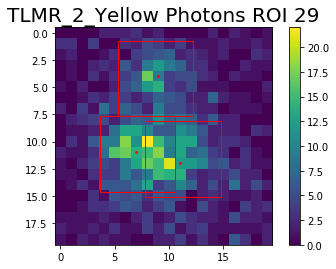

info message from bfgs algorithm is 4 

header dir already exists
b'N:\\Singlem\\singlem19-4\\October\\15_origamisT-LMR_NV\\TLMR_ensemble\\header\\TLMR_3.txt'
number of records is 6708614
ROI 0 touches image border, skipping 

TLMR_3_Yellow Photons ROI 1 attempt 0: value of Istar is -0.23 and Istarthreshold is -0.90, trying again
TLMR_3_Yellow Photons ROI 1 attempt 1: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 1 attempt 2: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 1 attempt 3: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 1 attempt 4: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 1 attempt 5: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 1:value of Istar is -1.20 and Istarthreshold is -0.90, success!


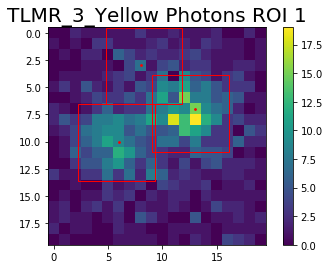

info message from bfgs algorithm is 4 

TLMR_3_Yellow Photons ROI 2 attempt 0: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 2 attempt 1: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 2 attempt 2: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 2 attempt 3: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 2 attempt 4: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 2 attempt 5: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 2 attempt 6: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 2 attempt 7: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 2 attempt 8: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 2 attempt 9: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 2 attempt 10: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 2 attempt 11: c routine returned info 1, trying again
TLMR_3_Ye

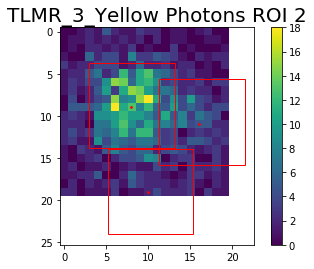

info message from bfgs algorithm is -1 

TLMR_3_Yellow Photons ROI 3 attempt 0: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 3 attempt 1: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 3 attempt 2: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 3 attempt 3: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 3 attempt 4: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 3 attempt 5: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 3 attempt 6: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 3:value of Istar is -2.24 and Istarthreshold is -2.05, success!


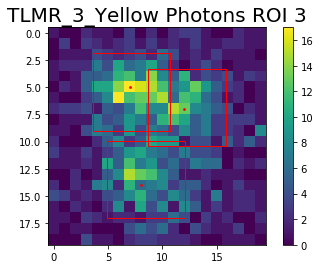

info message from bfgs algorithm is 4 

TLMR_3_Yellow Photons ROI 4 attempt 0: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 4 attempt 1: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 4:value of Istar is -2.96 and Istarthreshold is -2.71, success!


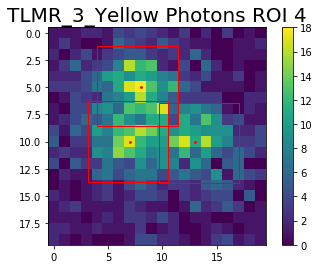

info message from bfgs algorithm is 4 

TLMR_3_Yellow Photons ROI 5 attempt 0: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 5 attempt 1: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 5 attempt 2: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 5 attempt 3: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 5 attempt 4: value of Istar is -0.02 and Istarthreshold is -0.65, trying again
TLMR_3_Yellow Photons ROI 5 attempt 5: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 5 attempt 6: value of Istar is -0.02 and Istarthreshold is -0.65, trying again
TLMR_3_Yellow Photons ROI 5 attempt 7: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 5 attempt 8: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 5 attempt 9: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 5:value of Istar is -0.83 and Istarthreshold is -0.65, success!


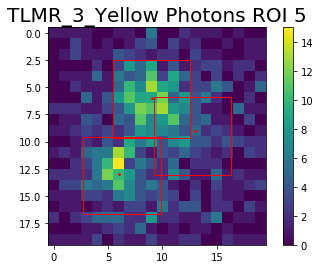

info message from bfgs algorithm is 4 

TLMR_3_Yellow Photons ROI 6 attempt 0: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 6 attempt 1: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 6 attempt 2: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 6 attempt 3: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 6 attempt 4: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 6 attempt 5: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 6 attempt 6: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 6 attempt 7: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 6 attempt 8: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 6 attempt 9: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 6 attempt 10: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 6 attempt 11: c routine returned info 1, trying again
TLMR_3_

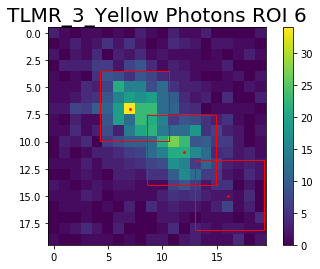

info message from bfgs algorithm is -1 

TLMR_3_Yellow Photons ROI 7 attempt 0: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 7 attempt 1: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 7 attempt 2: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 7:value of Istar is -1.04 and Istarthreshold is -0.80, success!


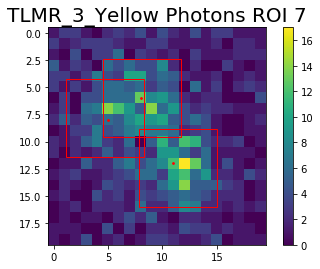

info message from bfgs algorithm is 4 

TLMR_3_Yellow Photons ROI 8 attempt 0: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 8 attempt 1: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 8 attempt 2: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 8 attempt 3: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 8 attempt 4: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 8 attempt 5: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 8 attempt 6: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 8 attempt 7: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 8 attempt 8: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 8 attempt 9: value of Istar is -1.17 and Istarthreshold is -2.24, trying again
TLMR_3_Yellow Photons ROI 8 attempt 10: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 8 attempt 11: c routine returned info

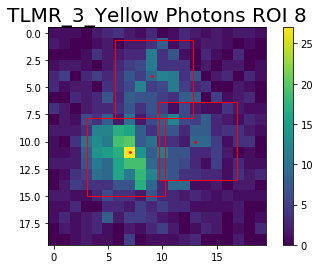

info message from bfgs algorithm is 4 

TLMR_3_Yellow Photons ROI 9 attempt 0: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 9 attempt 1: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 9 attempt 2: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 9:value of Istar is -0.86 and Istarthreshold is -0.70, success!


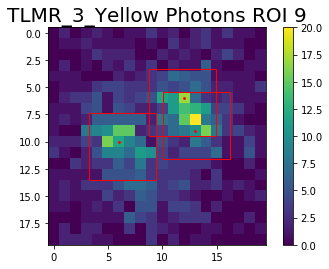

info message from bfgs algorithm is 4 

TLMR_3_Yellow Photons ROI 10 attempt 0: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 10 attempt 1: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 10 attempt 2: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 10:value of Istar is -2.23 and Istarthreshold is -2.03, success!


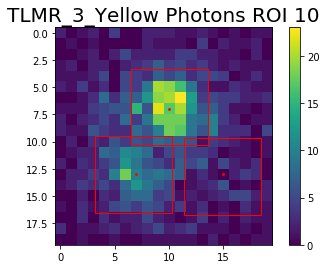

info message from bfgs algorithm is 4 

TLMR_3_Yellow Photons ROI 11 attempt 0: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 11 attempt 1: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 11 attempt 2: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 11 attempt 3: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 11 attempt 4: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 11 attempt 5: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 11 attempt 6: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 11 attempt 7: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 11 attempt 8: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 11 attempt 9: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 11 attempt 10: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 11 attempt 11: c routine returned info -1, trying ag

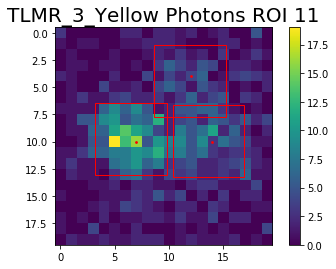

info message from bfgs algorithm is 4 

TLMR_3_Yellow Photons ROI 12 attempt 0: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 12 attempt 1: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 12 attempt 2: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 12 attempt 3: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 12 attempt 4: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 12 attempt 5: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 12 attempt 6: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 12 attempt 7: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 12 attempt 8: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 12 attempt 9: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 12 attempt 10: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 12 attempt 11: value of Istar is -1.23 and Istarthre

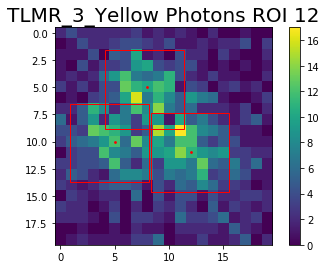

info message from bfgs algorithm is 4 

TLMR_3_Yellow Photons ROI 13 attempt 0: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 13 attempt 1: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 13 attempt 2: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 13 attempt 3: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 13 attempt 4: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 13 attempt 5: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 13 attempt 6: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 13 attempt 7: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 13 attempt 8: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 13 attempt 9: value of Istar is 0.56 and Istarthreshold is -0.08, trying again
TLMR_3_Yellow Photons ROI 13 attempt 10: value of Istar is 0.56 and Istarthreshold is -0.08, trying again
TLMR_3_Yellow Photons ROI 13

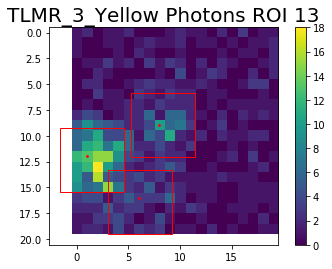

info message from bfgs algorithm is 4 

TLMR_3_Yellow Photons ROI 14 attempt 0: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 14 attempt 1: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 14 attempt 2: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 14 attempt 3: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 14 attempt 4: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 14 attempt 5: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 14 attempt 6: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 14:value of Istar is -0.46 and Istarthreshold is -0.20, success!


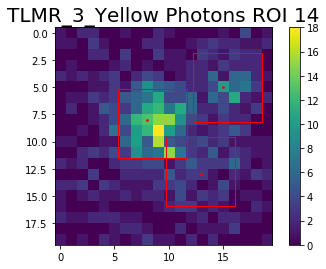

info message from bfgs algorithm is 4 

TLMR_3_Yellow Photons ROI 15 attempt 0: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 15 attempt 1: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 15 attempt 2: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 15 attempt 3: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 15 attempt 4: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 15 attempt 5: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 15 attempt 6: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 15 attempt 7: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 15 attempt 8: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 15:value of Istar is -2.59 and Istarthreshold is -2.57, success!


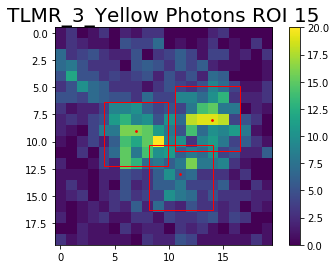

info message from bfgs algorithm is 4 

TLMR_3_Yellow Photons ROI 16:value of Istar is -1.02 and Istarthreshold is -0.74, success!


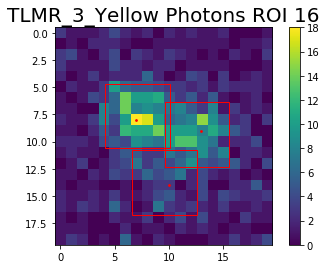

info message from bfgs algorithm is 4 

TLMR_3_Yellow Photons ROI 17 attempt 0: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 17 attempt 1: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 17 attempt 2: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 17 attempt 3: c routine returned info 2, trying again
TLMR_3_Yellow Photons ROI 17 attempt 4: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 17 attempt 5: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 17 attempt 6: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 17 attempt 7: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 17 attempt 8: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 17 attempt 9: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 17 attempt 10: c routine returned info -1, trying again
TLMR_3_Yellow Photons ROI 17 attempt 11: c routine returned info -1, trying

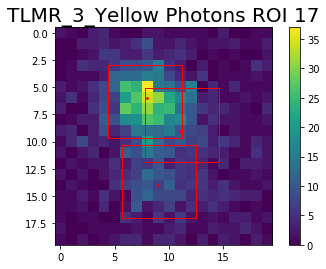

info message from bfgs algorithm is -1 

TLMR_3_Yellow Photons ROI 18 attempt 0: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 18 attempt 1: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 18 attempt 2: value of Istar is 0.67 and Istarthreshold is 0.25, trying again
TLMR_3_Yellow Photons ROI 18 attempt 3: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 18 attempt 4: value of Istar is 0.67 and Istarthreshold is 0.25, trying again
TLMR_3_Yellow Photons ROI 18 attempt 5: c routine returned info 1, trying again
TLMR_3_Yellow Photons ROI 18:value of Istar is 0.07 and Istarthreshold is 0.25, success!


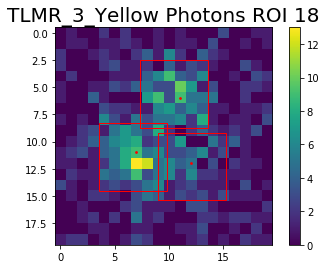

info message from bfgs algorithm is 4 

ROI 19 touches image border, skipping 

ROI 20 touches image border, skipping 

header dir already exists
b'N:\\Singlem\\singlem19-4\\October\\15_origamisT-LMR_NV\\TLMR_ensemble\\header\\TLMR_4.txt'
number of records is 6246250
TLMR_4_Yellow Photons ROI 0 attempt 0: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 0 attempt 1: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 0 attempt 2: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 0 attempt 3: c routine returned info -1, trying again
TLMR_4_Yellow Photons ROI 0 attempt 4: c routine returned info -1, trying again
TLMR_4_Yellow Photons ROI 0 attempt 5: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 0 attempt 6: c routine returned info -1, trying again
TLMR_4_Yellow Photons ROI 0 attempt 7: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 0 attempt 8: c routine returned info 1, trying again
TLMR_4_Yellow Phot

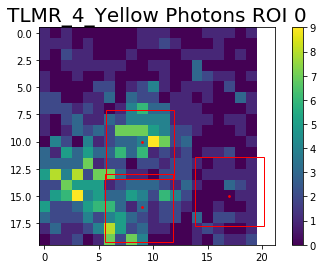

info message from bfgs algorithm is -1 

TLMR_4_Yellow Photons ROI 1 attempt 0: c routine returned info 2, trying again
TLMR_4_Yellow Photons ROI 1 attempt 1: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 1 attempt 2: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 1 attempt 3: c routine returned info -1, trying again
TLMR_4_Yellow Photons ROI 1 attempt 4: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 1:value of Istar is 0.33 and Istarthreshold is 0.61, success!


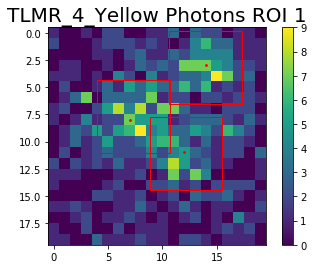

info message from bfgs algorithm is 4 

TLMR_4_Yellow Photons ROI 2 attempt 0: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 2 attempt 1: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 2 attempt 2: c routine returned info -1, trying again
TLMR_4_Yellow Photons ROI 2 attempt 3: c routine returned info 2, trying again
TLMR_4_Yellow Photons ROI 2 attempt 4: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 2 attempt 5: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 2 attempt 6: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 2 attempt 7: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 2 attempt 8: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 2 attempt 9: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 2 attempt 10: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 2:value of Istar is -1.70 and Istarthreshold is -1.47, success!

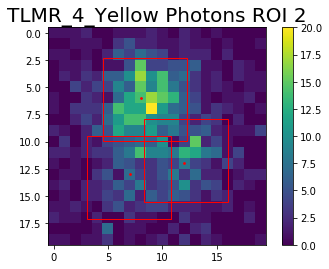

info message from bfgs algorithm is 4 

TLMR_4_Yellow Photons ROI 3 attempt 0: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 3 attempt 1: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 3:value of Istar is -2.03 and Istarthreshold is -1.86, success!


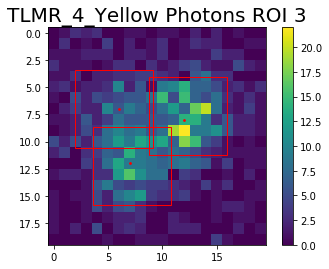

info message from bfgs algorithm is 4 

TLMR_4_Yellow Photons ROI 4 attempt 0: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 4 attempt 1: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 4 attempt 2: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 4:value of Istar is -1.58 and Istarthreshold is -1.40, success!


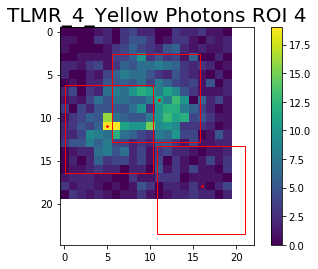

info message from bfgs algorithm is 4 

TLMR_4_Yellow Photons ROI 5 attempt 0: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 5 attempt 1: c routine returned info -1, trying again
TLMR_4_Yellow Photons ROI 5 attempt 2: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 5 attempt 3: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 5 attempt 4: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 5 attempt 5: value of Istar is 0.04 and Istarthreshold is -0.51, trying again
TLMR_4_Yellow Photons ROI 5:value of Istar is -0.76 and Istarthreshold is -0.51, success!


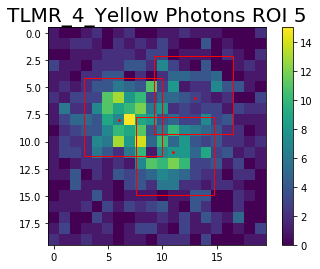

info message from bfgs algorithm is 4 

TLMR_4_Yellow Photons ROI 6 attempt 0: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 6 attempt 1: c routine returned info -1, trying again
TLMR_4_Yellow Photons ROI 6 attempt 2: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 6 attempt 3: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 6 attempt 4: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 6 attempt 5: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 6 attempt 6: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 6 attempt 7: value of Istar is 0.49 and Istarthreshold is 0.03, trying again
TLMR_4_Yellow Photons ROI 6 attempt 8: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 6 attempt 9: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 6 attempt 10: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 6:value of Istar is -0.16 and Istarthre

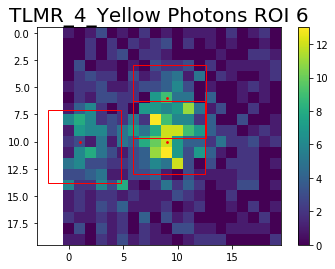

info message from bfgs algorithm is 4 

TLMR_4_Yellow Photons ROI 7 attempt 0: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 7 attempt 1: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 7 attempt 2: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 7 attempt 3: c routine returned info -1, trying again
TLMR_4_Yellow Photons ROI 7 attempt 4: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 7:value of Istar is -0.11 and Istarthreshold is 0.11, success!


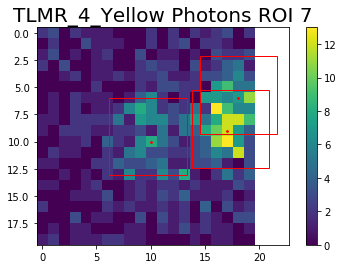

info message from bfgs algorithm is 4 

TLMR_4_Yellow Photons ROI 8 attempt 0: c routine returned info -1, trying again
TLMR_4_Yellow Photons ROI 8 attempt 1: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 8 attempt 2: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 8 attempt 3: c routine returned info -1, trying again
TLMR_4_Yellow Photons ROI 8 attempt 4: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 8 attempt 5: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 8 attempt 6: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 8 attempt 7: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 8 attempt 8: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 8 attempt 9: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 8 attempt 10: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 8 attempt 11: c routine returned info 1, trying again
TLMR_4_Y

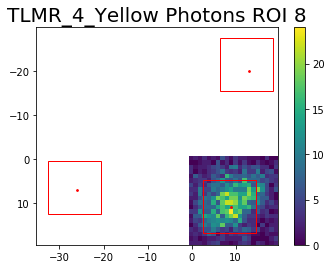

info message from bfgs algorithm is -1 

TLMR_4_Yellow Photons ROI 9 attempt 0: c routine returned info -1, trying again
TLMR_4_Yellow Photons ROI 9 attempt 1: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 9 attempt 2: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 9 attempt 3: c routine returned info -1, trying again
TLMR_4_Yellow Photons ROI 9 attempt 4: c routine returned info -1, trying again
TLMR_4_Yellow Photons ROI 9 attempt 5: c routine returned info -1, trying again
TLMR_4_Yellow Photons ROI 9 attempt 6: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 9 attempt 7: c routine returned info -1, trying again
TLMR_4_Yellow Photons ROI 9 attempt 8: c routine returned info -1, trying again
TLMR_4_Yellow Photons ROI 9 attempt 9: c routine returned info -1, trying again
TLMR_4_Yellow Photons ROI 9 attempt 10: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 9 attempt 11: c routine returned info 1, trying again
TL

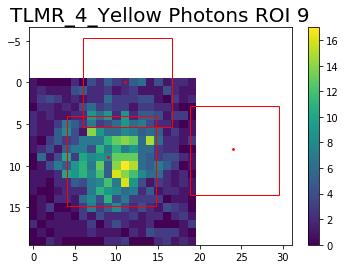

info message from bfgs algorithm is -1 

TLMR_4_Yellow Photons ROI 10 attempt 0: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 10 attempt 1: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 10 attempt 2: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 10 attempt 3: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 10 attempt 4: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 10 attempt 5: c routine returned info 1, trying again
TLMR_4_Yellow Photons ROI 10 attempt 6: c routine returned info -1, trying again
TLMR_4_Yellow Photons ROI 10 attempt 7: c routine returned info 1, trying again


KeyboardInterrupt: 

In [4]:
wdir = r'N:\Singlem\singlem19-4\October\15_origamisT-LMR_NV\TLMR_ensemble'
ROIDir = r'N:\Singlem\singlem19-4\October\15_origamisT-LMR_NV\TLMR_ensemble\Exported Images\ROIs'
ntacs = 256
model = 'three2DGaussian_c'
paramlst_c = []
for i, file in enumerate(files):
    if file[-4:] != '.ptu':
        continue
    fname = os.path.join(wdir, file).encode()
    CLR = IM.processLifetimeImage(fname, uselines = np.array([1,2]), ntacs = ntacs)
    CLR.loadLifetime()
    CLR.gate(32,150)
    CLR.loadIntensity()
    
    ROIfile = os.path.join(ROIDir, roifiles[i])
    roiSize = 20
    image = CLR.workIntensity.Y
#    outdir = os.path.join(wdir, file[:-4])
    outdir = r'N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\Exported Images\ROIsC_G'
    outname = file[:-4] + '_Green Photons.roi'
    paramlst_c.append(fitNrois(image, ROIfile, model, roiSize, outdir, showfig = True, savefig = False))
    gc.collect